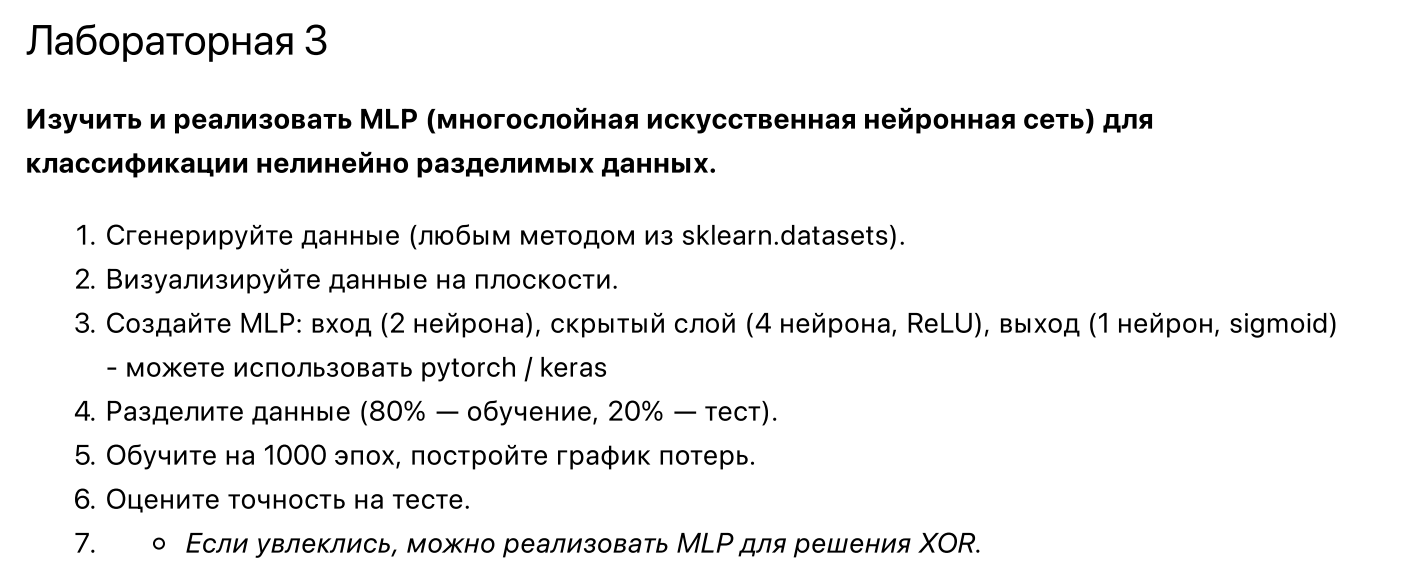

In [191]:
from sklearn.datasets import make_classification, make_regression
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

In [192]:
N_FEATURES = 2
FIRST_LAYER_SIZE = 2
SECOND_LAYER_SIZE = 4
OUTPUT_SIZE = 1
TEST_SIZE = 0.2
EPOCH = 1000
LR = 1e-2
SEED = 42

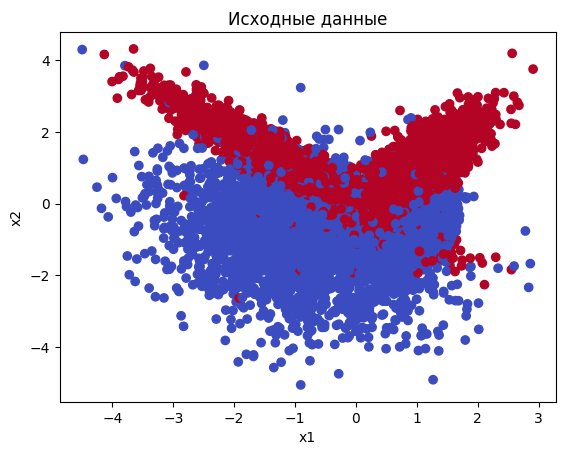

In [193]:
X, y = make_classification(
    n_samples=10000,
    n_features=N_FEATURES,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=SEED,
)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.title("Исходные данные")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [194]:
class Linear:
    def __init__(self, input_size, output_size):
        self.weights = torch.randn((input_size, output_size))
        self.bias = torch.zeros(output_size)

    def __call__(self, x):
        self.out = x @ self.weights + self.bias
        return self.out

    def parameters(self):
        return [self.weights] + [self.bias]


class ReLu:
    def __call__(self, x):
        self.out = torch.relu(x)
        return self.out

    def parameters(self):
        return []


class Sigmoid:
    def __call__(self, x):
        self.out = torch.sigmoid(x)
        return self.out

    def parameters(self):
        return []

In [195]:
layers = [
    Linear(N_FEATURES, FIRST_LAYER_SIZE),
    ReLu(),
    Linear(FIRST_LAYER_SIZE, SECOND_LAYER_SIZE),
    ReLu(),
    Linear(SECOND_LAYER_SIZE, OUTPUT_SIZE),
    Sigmoid(),
]

In [196]:
parameters = [
    parameters for layer in layers for parameters in layer.parameters()
]

for p in parameters:
    p.requires_grad = True

In [197]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=SEED,
)

In [198]:
losses = []

for i in range(EPOCH):
    x = X_train
    for layer in layers:
        x = layer(x)

    loss = F.binary_cross_entropy(x, y_train)
    losses.append(loss.detach())

    for p in parameters:
        p.grad = None
    loss.backward()

    for p in parameters:
        p.data += -LR * p.grad

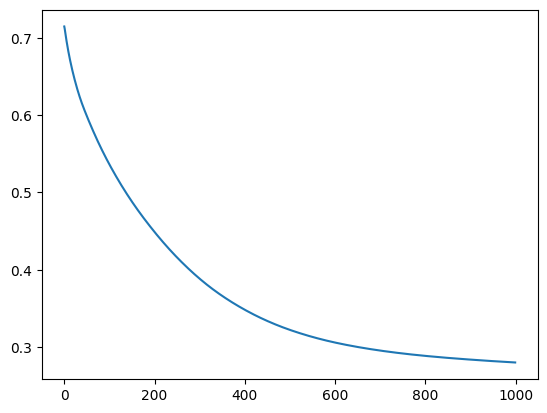

In [199]:
plt.plot(torch.tensor(losses))

In [200]:
acc = 0
with torch.no_grad():
    x = X_test
    for layer in layers:
        x = layer(x)

    predictions = (x > 0.5).float()
    acc = accuracy_score(y_test.numpy(), predictions.numpy())

In [201]:
acc

0.895